# Studienarbeit

## Maximilian Gaul

In [27]:
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

## Aufgabe 1

#### Laden Sie die Daten aus `adult.data` in einen Pandas DataFrame

In [33]:
hdr = ["age", "workclass", "fnlwgt", "education", "education_num",
       "marital_status", "occupation", "relationship",
      "race", "sex", "capital_gain", "capital_loss",
      "hours_per_week", "native_country", "income"]
df = pd.read_csv("adult.data", skipinitialspace=True, names=hdr)

In [34]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Aufgabe 2

#### 1) In den nominalen Daten sind noch unbekannte Werte, gekennzeichnet durch `?`, vorhanden. Bereinigen Sie die Daten, indem Sie alle Zeilen entfernen, die unbekannte Werte enthalten.

In [35]:
def query_builder(hdr, val):
    query = ''
    for h in hdr:
        query += '{0} != "{1}" &'.format(str(h), str(val))
    return query[:-1]

df = df.query(query_builder(hdr, "?"), inplace=False)

#### 2) Entfernen Sie die Spalten `fnlwgt` und `income` als Features

In [36]:
X = df.copy()
X = X.drop(columns=["fnlwgt", "income"])
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


#### 3) Als Target soll das Feature `income` dienen, jedoch kommt nicht jeder Algorithmus mit nominalen Features klar. Konvertieren Sie das Target daher, sodass `income` den Wert `1` annimmt, falls das `income` ursprünglich den Wert `>50K` hat und `0` andernfalls

In [37]:
y = pd.DataFrame(
    {"income": np.where(df['income'] == ">50K", 1, 0)}
)
y

,income
0,0
1,0
2,0
3,0
4,0
...,...
30157,0
30158,1
30159,0
30160,0


#### 4) Wieviel Prozent der Personen haben ein Einkommen von mehr als `50.000$`?

In [38]:
total = len(y.index)
rich = len(y.query('income == 1').index)
print(rich / total, "% haben ein Einkommen von mehr als 50.000$")

0.24892248524633645 % haben ein Einkommen von mehr als 50.000$


#### 5) Was ist die Genauigkeit eines naiven Modells, welches unabhängig von den tatsächlichen Features immer weniger als `50.000$` Einkommen zuweist? Dies ist das Mindestmaß an Genauigkeit, an dem sich ihre späteren Modelle messen müssen

In [39]:
tn = total - rich
print("total:", total)
print("tn:", tn)

total: 30162
tn: 22654


Die Genauigkeit ist definiert als $\frac{tp + tn}{tp + tn + fp + fn}$

`tp` ist die Anzahl der Personen, die das Modell als `>50k` einstuft und die auch tatsächlich `>50k` verdienen. Im Fall des naiven Modells ist `tp = 0`.

`tn` ist die Anzahl der Personen, die das Modell als `<=50k` einstuft und die auch tatsächlich `<=50k` verdiene. Im Fall des naiven Modells ist `tn = 22654`.

Der Wert des Nenners `tp + tn + fp + fn` entspricht der Gesamtzahl an Datensätzen.
Damit lässt sich die Genauigkeit berechnen:

$acc = \frac{0 + 22654}{30162} = 0.7511\%$

## Aufgabe 3

#### Schreiben Sie eine Methode `transform(X)` welche einen Feature-Dataframe `X` als Parameter erhält und einen transformierten DataFrame zurückgibt.

Die im Wertebereich verzerrten Features `capital_gain` und `capital_loss` sollten durch Logarithmierung normalisiert werden. Verwenden Sie dafür die Funktion

$$f: \mathbb{R} \rightarrow \mathbb{R}, f(x) = log(x + 1)$$

In [40]:
f = lambda x: math.log(x + 1)

In [43]:
def transform(X):
    _X = X.copy()
    _X["capital_gain"] = _X["capital_gain"].apply(f)
    _X["capital_loss"] = _X["capital_loss"].apply(f)
    
    numeric_headers = [
        "age", "education_num", "capital_gain",
        "capital_loss", "hours_per_week"
    ]
    
    nominal_headers = [
        "workclass", "education", "marital_status",
        "occupation", "relationship",
        "race", "sex", "native_country"
    ]
    
    for nmh in numeric_headers:
        min_max_scaler = preprocessing.MinMaxScaler()
        _X[nmh] = min_max_scaler.fit_transform(_X[nmh].values.reshape(-1, 1))
    _X = pd.get_dummies(_X)
    #for nmh in nominal_headers:
    #    dummies = pd.get_dummies(
    #        data=_X, columns=[nmh]
    #    )
    #    _X[nmh] = dummies
    
    return _X

In [44]:
X_trans = transform(X)
X_trans

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0.000000,0.0,0.377551,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.315068,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0.561644,0.533333,0.000000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0.068493,0.533333,0.000000,0.0,0.193878,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Splitten Sie den Datensatz in einen Trainings- und Testdatensatz, wobei der Testdatensatz eine relative Größe von 20% haben soll. Verwenden Sie für die Reproduzierbarkeit einen `random_state = 0`

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

## Aufgabe 4

#### Wählen Sie drei verschiedene, in der Vorlesung behandelte Modelltypen und trainieren Sie die entsprechenden Modelle mit den Standardparametern (keine Parameter). Geben Sie zu jedem Modell die Genauigkeit auf dem Testdatensatz aus

Da es sich um ein (binäres) Klassifizierungsproblem handelt werden nur Modelltypen verwendet, die zur Klassifikation von Daten geeignet sind.

Gleichzeitig ist nicht bekannt, ob die Daten linear separierbar sind, d.h. einfache Neuronale Netze wie Perzeptron oder Adaline sind ungeeignet.

Daher werden folgende Modelle trainiert:

In [46]:
def model_to_accuracy(model, X_test, y_test):
    model_predict = model.predict(X_test)
    cf = confusion_matrix(
        y_true=y_test, y_pred=model_predict, labels=[1, 0]
    )

    TP = cf[0][0]
    FN = cf[0][1]
    FP = cf[1][0]
    TN = cf[1][1]

    return (TP + TN) / (TP + TN + FP + FN)

Logistic Regression

In [48]:
lr = LogisticRegression().fit(X_train, y_train.values.ravel())
lr_accuracy = model_to_accuracy(lr, X_test, y_test)
print("Genauigkeit LogisticRegression:", lr_accuracy)

Genauigkeit LogisticRegression: 0.8392176363334991


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest-Neighbors

In [24]:
knn = KNeighborsClassifier().fit(X_train, y_train.values.ravel())
knn_accuracy = model_to_accuracy(knn, X_test, y_test)
print("Genauigkeit KNN:", knn_accuracy)

Genauigkeit KNN: 0.8168407094314603


Support Vector Klassifikation

In [25]:
svc = SVC().fit(X_train, y_train.values.ravel())
svc_accuracy = model_to_accuracy(svc, X_test, y_test)
print("Genauigkeit SVC:", svc_accuracy)

Genauigkeit SVC: 0.8392176363334991


## Aufgabe 5

#### Wählen Sie das im vorherigen Schritt beste Modell und tunen Sie die Hyperparameter um möglichst eine noch bessere Performance zu bekommen

Das Modell mit der besten Genauigkeit ist das `LogisticRegression`-Modell.

Dieses Modell wird nun anhand der Hyperparameter `C`, `tol`, `solver` und `penalty` mit einer Rastersuche über alle Wertekombinationen getuned.

Bestimme penalties kommen nur mit bestimmten solvern zurecht (und anders herum), darauf wird entsprechend Rücksicht genommen.

In [58]:
C = [0.01, 0.05, 0.8, 2.0, 5.0, 10.0]
tol = [1e-5, 1e-4, 1e-3, 1e-2]
solver = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
penalties = ["l1", "l2", "elasticnet"]

combinations = len(C) * len(tol) * len(solver) * len(penalties)
print("Trying", combinations, "combinations...")

i = np.arange(
    0, combinations, 1
)
combination_dict = []

vals = []
for c in C:
    for t in tol:
        for s in solver:
            for p in penalties:
                l1_ratio = None
                if p == "elasticnet":
                    s = "saga"
                    l1_ratio = 0.5
                elif s in ["newton-cg", "lbfgs", "sag"]:
                    p = "l2"
                model = LogisticRegression(
                    C=c, tol=t, penalty=p, solver=s, l1_ratio=l1_ratio
                )
                model.fit(X_train, y_train.values.ravel())
                acc = model_to_accuracy(model, X_test, y_test)
                vals.append(acc)
                combination_dict.append({
                    "C": c,
                    "tol": t,
                    "solver": s,
                    "penalty": p,
                    "l1_ratio": l1_ratio
                })
                if(len(vals) % 10 == 0):
                    print("We are at", len(vals))

Trying 360 combinations...
We are at 10
We are at 20
We are at 30
We are at 40
We are at 50
We are at 60
We are at 70
We are at 80
We are at 90
We are at 100
We are at 110
We are at 120


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 130


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 140


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


We are at 150


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

We are at 160


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

We are at 170
We are at 180


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 190


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 200


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 210


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 220


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_

We are at 230
We are at 240


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 250


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 260


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 270


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 280


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 290
We are at 300


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 310


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 320


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 330


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


We are at 340


c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\users\test\appdat

We are at 350
We are at 360


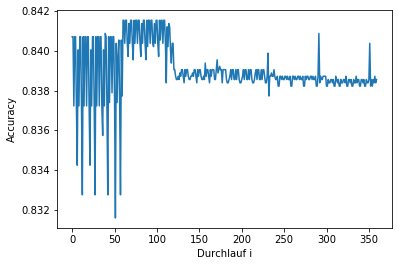

In [59]:
plt.plot(i, vals)
plt.xlabel("Durchlauf i")
plt.ylabel("Accuracy")
plt.show()

In [60]:
best_comb = combination_dict[np.argmax(vals)]
print("Maximale Genauigkeit", np.array(vals).max(), "für ", best_comb)

Maximale Genauigkeit 0.8415382065307475 für  {'C': 0.05, 'tol': 1e-05, 'solver': 'newton-cg', 'penalty': 'l2', 'l1_ratio': None}


In [61]:
best_model = LogisticRegression(
    C=best_comb["C"],
    tol=best_comb["tol"],
    solver=best_comb["solver"],
    penalty=best_comb["penalty"]
)
best_model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=1e-05, verbose=0,
                   warm_start=False)

## Aufgabe 6

#### Erstellen Sie einen DataFrame mit Werten für eine erfundene Person

In [62]:
person = pd.DataFrame({
    "age": 23,
    "workclass": "Self-emp-inc",
    "education": "Bachelors",
    "education_num": 12,
    "marital_status": "Never-married",
    "occupation": "Tech-support",
    "relationship": "Unmarried",
    "race": "White",
    "sex": "Male",
    "capital_gain": 5,
    "capital_loss": 0,
    "hours_per_week": 20,
    "native_country": "Germany"
}, index=[0])
person

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,23,Self-emp-inc,Bachelors,12,Never-married,Tech-support,Unmarried,White,Male,5,0,20,Germany


#### Transformieren Sie diese Person ebenfalls mit Hilfe der `transform`-Methode. Da die Normierung nur auf größeren Datensätzen Sinn macht, vereinen Sie den ursprünglichen DataFrame und die neue Person und transformieren das Gesamtpaket

In [63]:
Xp = pd.concat((X, person))
Xp_trans = transform(Xp)

In [64]:
tail = Xp_trans.tail(1)
tail

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.082192,0.733333,0.15563,0.0,0.193878,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Machen Sie mit Hilfe des Modells eine Vorhersage. Würde die Person als potentieller Spender ausgewählt werden?

In [65]:
p = best_model.predict(Xp_trans)[-1]

In [66]:
p

0

Die Person würde nicht als potentieller Spender ausgewählt werden da die Vorhersage die Klasse `0` zurückliefert (`<=50k`)